Gabriela Vega
Machine Learning
Assignment 2
Shallow Models Training, Validation and Tuning


In [1]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
df = pd.read_csv("/Users/gabyvega/Downloads/bike+sharing+dataset/hour.csv")

# displaying basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


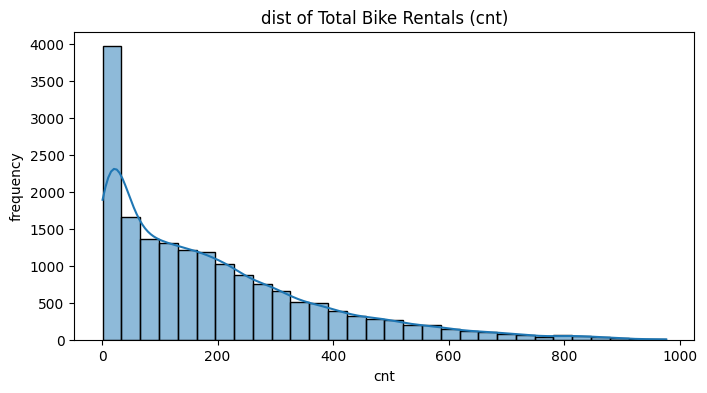

skewness of cnt: 1.2774116037490577


In [7]:
#checking target value Dist

plt.figure(figsize=(8, 4))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('dist of Total Bike Rentals (cnt)')
plt.xlabel('cnt')
plt.ylabel('frequency')
plt.show()

# skewness
print("skewness of cnt:", df['cnt'].skew())


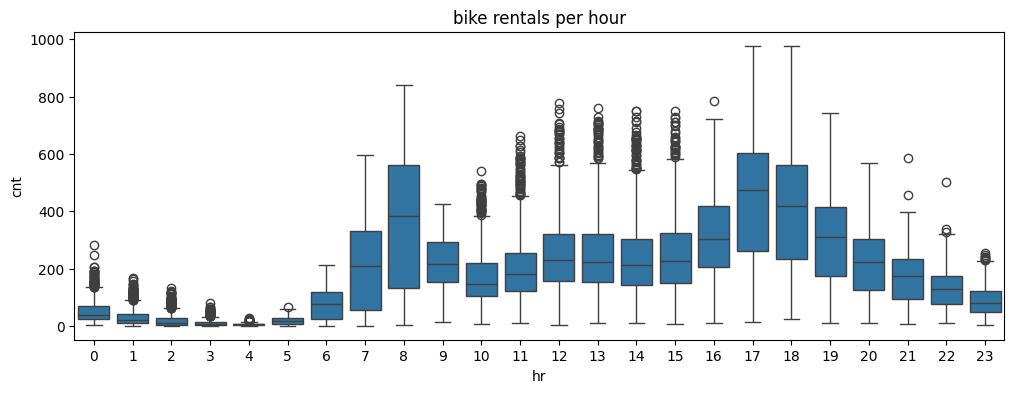

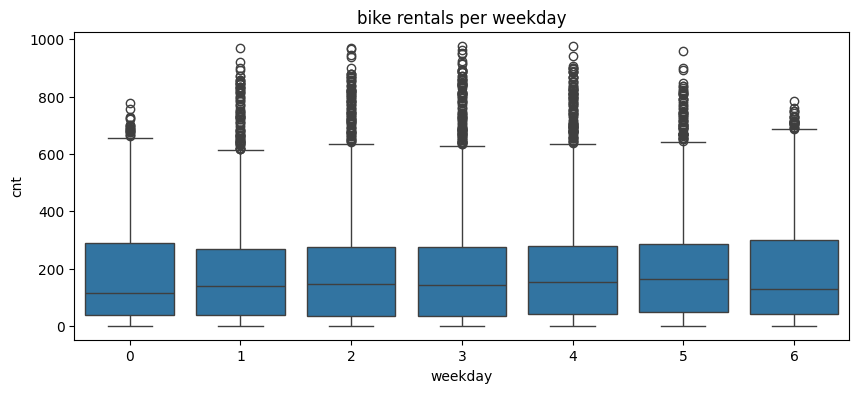

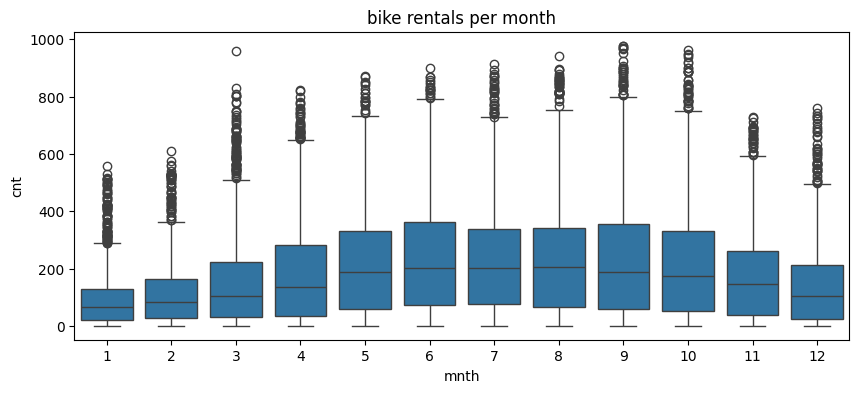

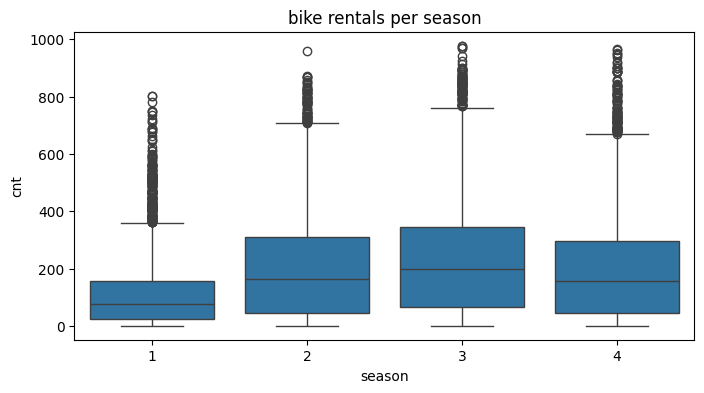

In [8]:
#temporal features

# tentals per hour
plt.figure(figsize=(12, 4))
sns.boxplot(x='hr', y='cnt', data=df)
plt.title('bike rentals per hour')
plt.show()

# rentals per weekday
plt.figure(figsize=(10, 4))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('bike rentals per weekday')
plt.show()

# rentals per month
plt.figure(figsize=(10, 4))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('bike rentals per month')
plt.show()

# rentals per season
plt.figure(figsize=(8, 4))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('bike rentals per season')
plt.show()


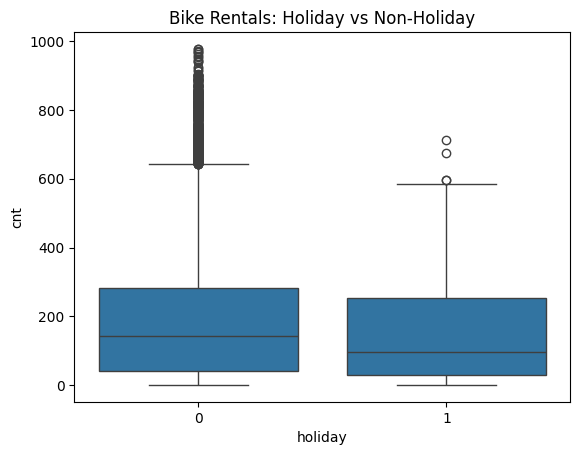

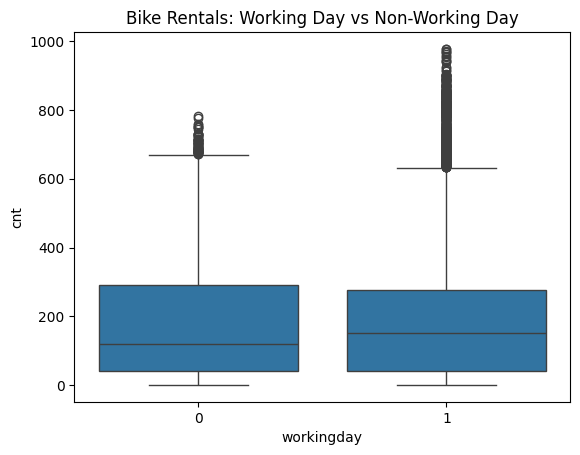

In [9]:
#binary features 

# rentals by holiday
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('Bike Rentals: Holiday vs Non-Holiday')
plt.show()

# rentals by working day
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('Bike Rentals: Working Day vs Non-Working Day')
plt.show()


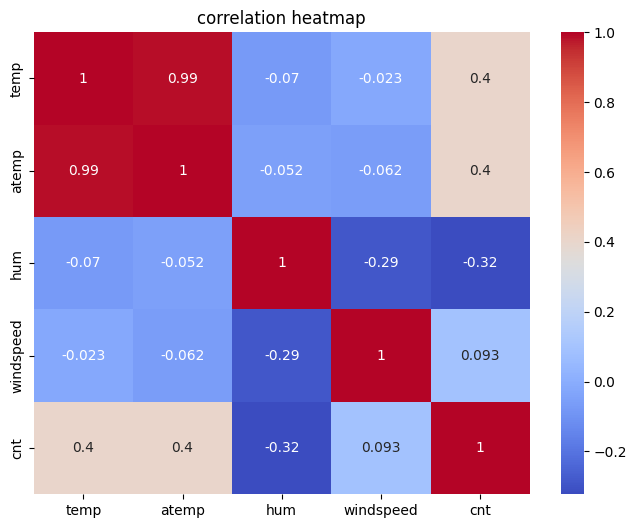

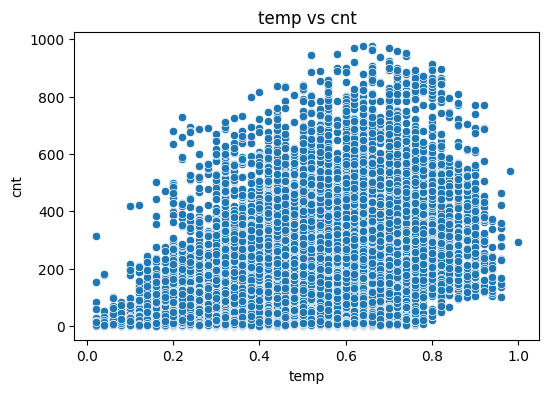

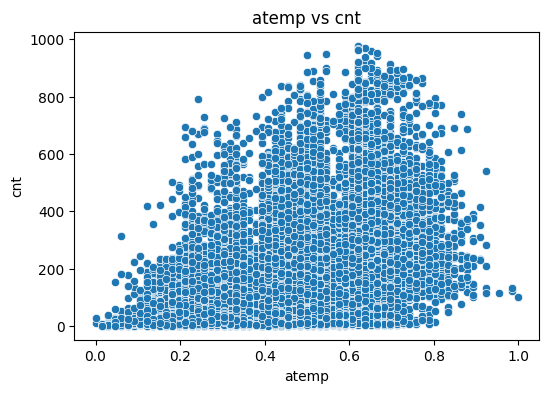

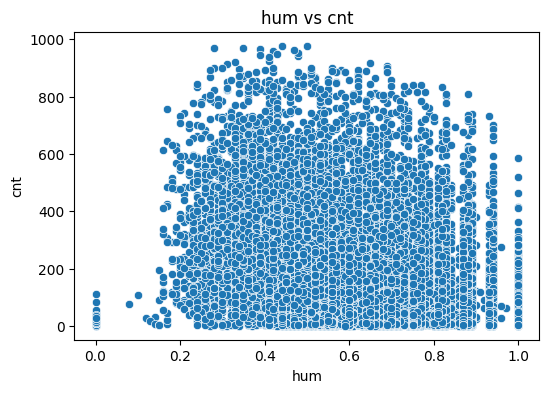

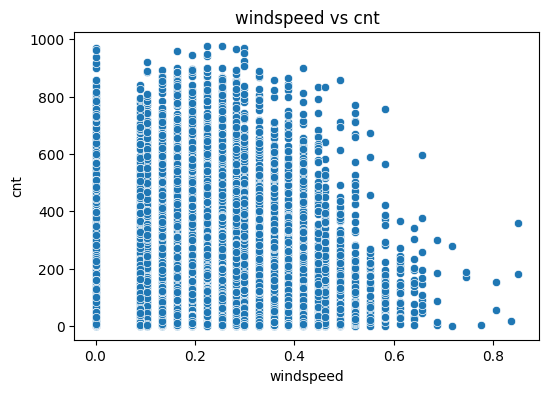

In [10]:
#weather related features

# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

# scatter plots
features = ['temp', 'atemp', 'hum', 'windspeed']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='cnt')
    plt.title(f'{feature} vs cnt')
    plt.show()


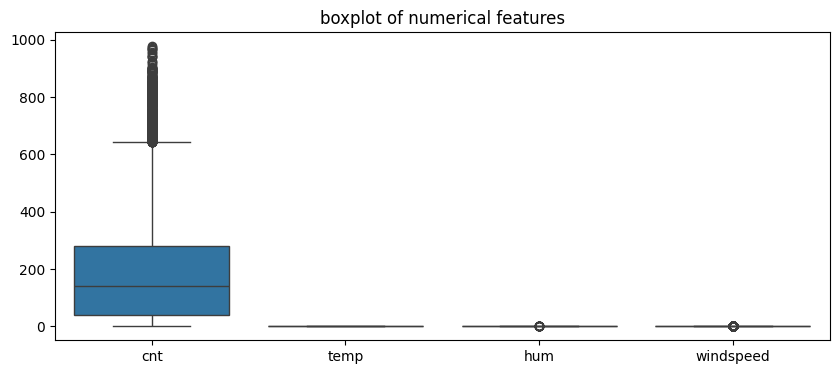

In [11]:
# outliers and dropping some columns

# looking for potential outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['cnt', 'temp', 'hum', 'windspeed']])
plt.title('boxplot of numerical features')
plt.show()

# dropping unused or leaky columns
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)
